In [1]:
import pandas as ps
import numpy as np
import re
import csv
import matplotlib

In [2]:
def openFile(path):
    return ps.read_csv(path, index_col=0) #index_col=0 has the effect of excluding any unnamed fields

def toDF(rawData):
    return ps.DataFrame(rawData)

def dropDuplicates(rawData):
    return toDF(rawData).drop_duplicates()

def filter(df, columns):
    return df[columns] 

def merge(df1, df2, protocol, on):
    return ps.merge(df1, df2, how=protocol, on=on)

def extractYear(title):
    li = re.search('(\d{4})', title)
    if li:
        return li[1]
    return -1

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# Drop duplicates
rawDF = dropDuplicates(openFile('../winemag-data-130k-v2.csv'))
print(filter(rawDF, ["title"]))

                                                    title
id                                                       
0                       Nicosia 2013 Vulkà Bianco  (Etna)
1           Quinta dos Avidagos 2011 Avidagos Red (Douro)
2           Rainstorm 2013 Pinot Gris (Willamette Valley)
3       St. Julian 2013 Reserve Late Harvest Riesling ...
4       Sweet Cheeks 2012 Vintner's Reserve Wild Child...
...                                                   ...
129966  Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...
129967                  Citation 2004 Pinot Noir (Oregon)
129968  Domaine Gresser 2013 Kritt Gewurztraminer (Als...
129969      Domaine Marcel Deiss 2012 Pinot Gris (Alsace)
129970  Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...

[119988 rows x 1 columns]


In [5]:
# Extract year from dataset
with open('../years.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["id","year"])
    for idx,row in enumerate(filter(rawDF, ['title']).itertuples(index=True, name='Pandas')):
        writer.writerow([idx,extractYear(row.title)])

newDF = openFile('../years.csv')
print(newDF)

        year
id          
0       2013
1       2011
2       2013
3       2013
4       2012
...      ...
119983  2013
119984  2004
119985  2013
119986  2012
119987  2012

[119988 rows x 1 columns]


In [6]:
# Merge the two datasets
merge(rawDF, newDF, 'outer', "id").to_csv('../cleaned.csv')

print(openFile('../cleaned.csv'))

         country                                        description  \
id                                                                    
0          Italy  Aromas include tropical fruit, broom, brimston...   
1       Portugal  This is ripe and fruity, a wine that is smooth...   
2             US  Tart and snappy, the flavors of lime flesh and...   
3             US  Pineapple rind, lemon pith and orange blossom ...   
4             US  Much like the regular bottling from 2012, this...   
...          ...                                                ...   
119977       NaN                                                NaN   
119978       NaN                                                NaN   
119979       NaN                                                NaN   
119980       NaN                                                NaN   
119981       NaN                                                NaN   

                               designation  points  price           province

Using price, points, variety, region1, country, winery, year. Drop everything else.

In [7]:
# Filter for interested fields
df = filter(toDF(openFile('../cleaned.csv')), ["title","price", "points", "variety", "region_1", "country", "winery", "year"])
print(df)

                                                    title  price  points  \
id                                                                         
0                       Nicosia 2013 Vulkà Bianco  (Etna)    NaN    87.0   
1           Quinta dos Avidagos 2011 Avidagos Red (Douro)   15.0    87.0   
2           Rainstorm 2013 Pinot Gris (Willamette Valley)   14.0    87.0   
3       St. Julian 2013 Reserve Late Harvest Riesling ...   13.0    87.0   
4       Sweet Cheeks 2012 Vintner's Reserve Wild Child...   65.0    87.0   
...                                                   ...    ...     ...   
119977                                                NaN    NaN     NaN   
119978                                                NaN    NaN     NaN   
119979                                                NaN    NaN     NaN   
119980                                                NaN    NaN     NaN   
119981                                                NaN    NaN     NaN   

           

In [8]:
# Remove any NaN corrupted entries
drop = []
for idx,row in enumerate(df.itertuples(index=True, name='Pandas')):
    for ele in row:
        if ps.isna(ele):
            drop.append(idx)
# Drop the marked rows
df.drop(df.index[drop]).to_csv('../cleaned.csv')
# Reopen cleaned file
df = toDF(openFile('../cleaned.csv'))
print(df)

                                                    title  price  points  \
id                                                                         
2           Rainstorm 2013 Pinot Gris (Willamette Valley)   14.0    87.0   
3       St. Julian 2013 Reserve Late Harvest Riesling ...   13.0    87.0   
4       Sweet Cheeks 2012 Vintner's Reserve Wild Child...   65.0    87.0   
5       Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...   15.0    87.0   
6        Terre di Giurfo 2013 Belsito Frappato (Vittoria)   16.0    87.0   
...                                                   ...    ...     ...   
119982           El Enemigo 2014 Cabernet Franc (Mendoza)   28.0    90.0   
119983       Frank Family 2013 Petite Sirah (Napa Valley)   35.0    90.0   
119984  Giacosa Fratelli 2013 Basarin Vigna Gianmatè  ...   55.0    90.0   
119986  VGS Chateau Potelle 2015 Eau de Tony Sauvignon...   40.0    90.0   
119987  Vinessens 2014 La Casica del Abuelo Red (Alica...   42.0    90.0   

           

In [9]:
# Remove any negative number entries and such
"""
row[2] == price
row[3] == points
row[8] == year (if year is -1 it means the bottle didn't contain a year and we have no data on it)
"""
drop = []
for idx,row in enumerate(df.itertuples(index=True, name='Pandas')):
    if row[2] < 0 or row[3] < 0 or row[3] > 100 or row[8] == -1:
        drop.append(idx)
df.drop(df.index[drop]).to_csv('../cleaned.csv')
# Reopen cleaned file
df = toDF(openFile('cleaned.csv'))
print(df)

FileNotFoundError: [Errno 2] No such file or directory: 'cleaned.csv'

In [ ]:
df.describe()

,price,points,year
count,83807.000000,83807.000000,83807.000000
mean,36.960433,88.438579,2010.354087
std,42.522720,3.095273,9.020459
min,4.000000,80.000000,1000.000000
25%,18.000000,86.000000,2009.000000
50%,28.000000,88.000000,2011.000000
75%,45.000000,91.000000,2013.000000
max,3300.000000,100.000000,2017.000000


In this first EDA, we're trying to further find odd looking data. Notice that we have year 7200 in our dataset. 

In [ ]:
drop = []
for idx,row in enumerate(df.itertuples(index=True, name='Pandas')):
    if row[8] > 2023:
        drop.append(idx)
df.drop(df.index[drop]).to_csv('../cleaned.csv')
# Reopen cleaned file
df = toDF(openFile('cleaned.csv'))
print(df)

                                                    title  price  points  \
id                                                                         
2           Rainstorm 2013 Pinot Gris (Willamette Valley)   14.0    87.0   
3       St. Julian 2013 Reserve Late Harvest Riesling ...   13.0    87.0   
4       Sweet Cheeks 2012 Vintner's Reserve Wild Child...   65.0    87.0   
5       Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...   15.0    87.0   
6        Terre di Giurfo 2013 Belsito Frappato (Vittoria)   16.0    87.0   
...                                                   ...    ...     ...   
119982           El Enemigo 2014 Cabernet Franc (Mendoza)   28.0    90.0   
119983       Frank Family 2013 Petite Sirah (Napa Valley)   35.0    90.0   
119984  Giacosa Fratelli 2013 Basarin Vigna Gianmatè  ...   55.0    90.0   
119986  VGS Chateau Potelle 2015 Eau de Tony Sauvignon...   40.0    90.0   
119987  Vinessens 2014 La Casica del Abuelo Red (Alica...   42.0    90.0   

           

In [ ]:
df.describe()

,price,points,year
count,83807.000000,83807.000000,83807.000000
mean,36.960433,88.438579,2010.354087
std,42.522720,3.095273,9.020459
min,4.000000,80.000000,1000.000000
25%,18.000000,86.000000,2009.000000
50%,28.000000,88.000000,2011.000000
75%,45.000000,91.000000,2013.000000
max,3300.000000,100.000000,2017.000000


This EDA serves to confirm integrity of our data. Looks good so far. 

array([[<Axes: title={'center': '80.0'}>,
        <Axes: title={'center': '81.0'}>,
        <Axes: title={'center': '82.0'}>,
        <Axes: title={'center': '83.0'}>,
        <Axes: title={'center': '84.0'}>],
       [<Axes: title={'center': '85.0'}>,
        <Axes: title={'center': '86.0'}>,
        <Axes: title={'center': '87.0'}>,
        <Axes: title={'center': '88.0'}>,
        <Axes: title={'center': '89.0'}>],
       [<Axes: title={'center': '90.0'}>,
        <Axes: title={'center': '91.0'}>,
        <Axes: title={'center': '92.0'}>,
        <Axes: title={'center': '93.0'}>,
        <Axes: title={'center': '94.0'}>],
       [<Axes: title={'center': '95.0'}>,
        <Axes: title={'center': '96.0'}>,
        <Axes: title={'center': '97.0'}>,
        <Axes: title={'center': '98.0'}>,
        <Axes: title={'center': '99.0'}>],
       [<Axes: title={'center': '100.0'}>, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

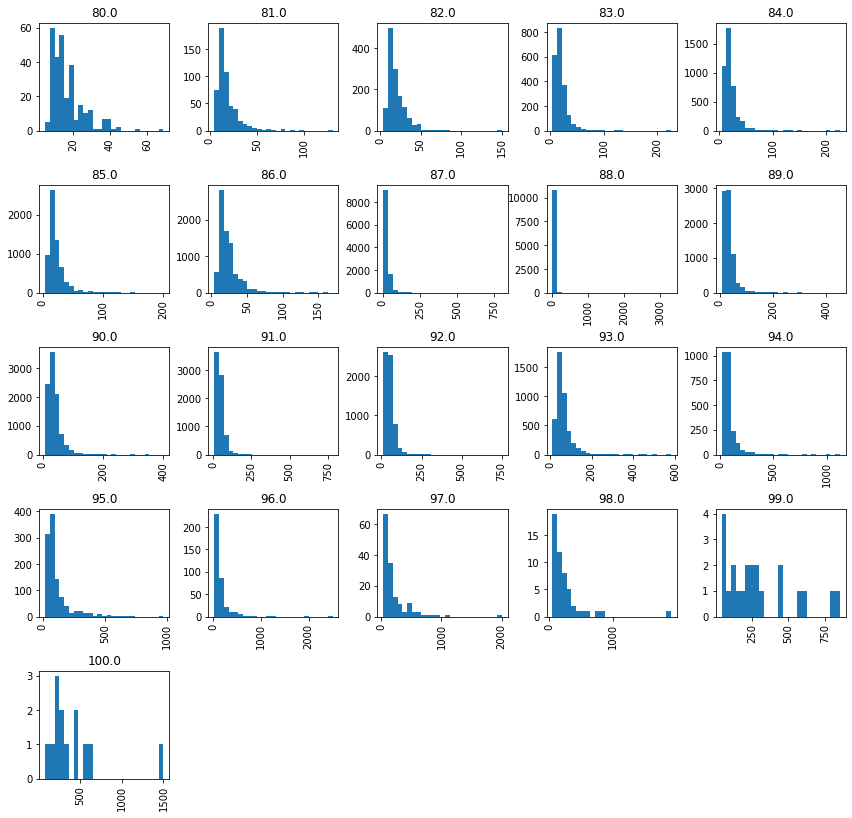

In [ ]:
df.hist(column='price', by='points', bins=25, figsize=(14,14), grid=False) 

In this EDA step, we ask for each of the possible wine points (80-100), how are they generally priced and how many of them are priced like that. As we can see, it seems like most wines are priced well below 1000, with most of the prices looking like they're around the $50 mark. 

array([[<Axes: title={'center': 'Argentina'}>,
        <Axes: title={'center': 'Australia'}>,
        <Axes: title={'center': 'Canada'}>],
       [<Axes: title={'center': 'France'}>,
        <Axes: title={'center': 'Italy'}>,
        <Axes: title={'center': 'Spain'}>],
       [<Axes: title={'center': 'US'}>, <Axes: >, <Axes: >]], dtype=object)

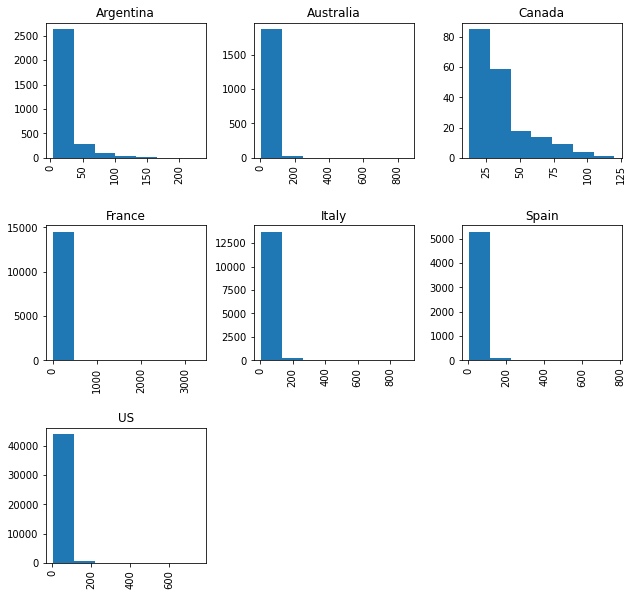

In [ ]:
df.hist(column='price', by='country', bins=7, figsize=(10,10), grid=False) 

Next, we plot price against country. Notice that most wines seem to come from the US, with Italy and France following behind. Our histogram here also confirms that pricess tend to fall well below 200. 

<Axes: xlabel='price', ylabel='year'>

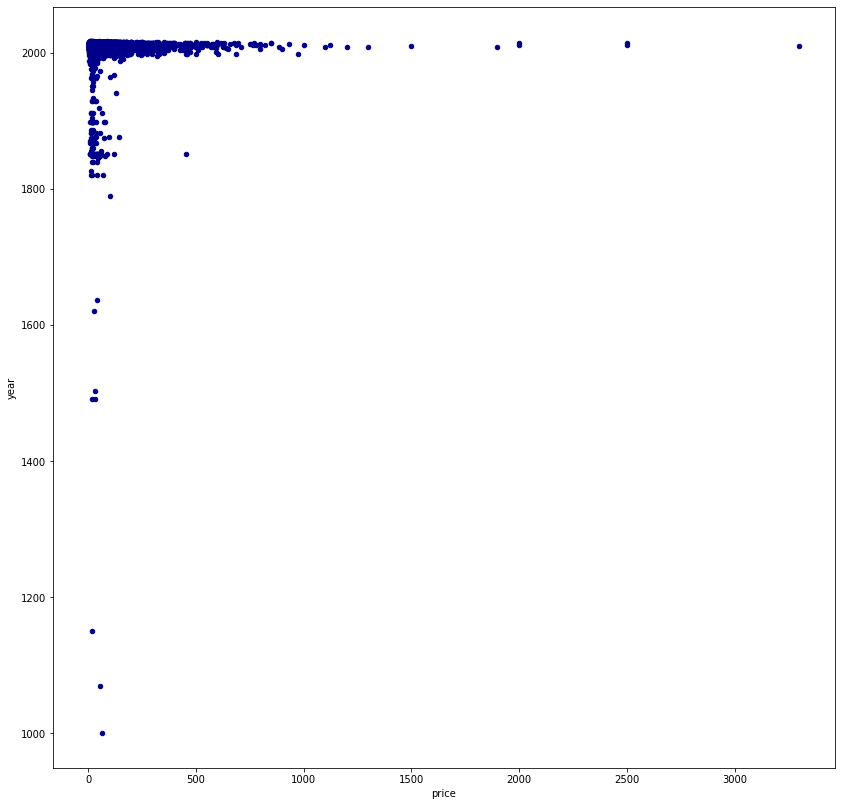

In [ ]:
df.plot.scatter(x='price',y='year',c='DarkBlue', figsize=(14,14))

In this scatterplot, yet again we confirm the fact that most wines fall under 200. Interestingly, in this plot we see that most of our wine is gathered around and above year 2000 (y-axis). Through the scatterplot, we see that wines between 1800 - 2000 are also a significant amount, with those under 1800 being sparse and extremely rare. 

### Cleaning checklist
- Drop obvious duplicates
- Extract years from titles of wine
- Joined years as a feature for the dataset
- Dropped unnecessary columns
- Drop any rows with at least one NaN value
- Drop any rows with negative price, points, and year values (Counts for 3 cleaning steps)
- Drop years greater than 2023
> Total 9

<Axes: xlabel='points', ylabel='price'>

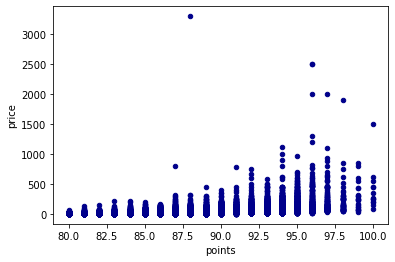

In [ ]:
df.plot.scatter(x='points',y='price',c='DarkBlue')

We do another price to point plot, this time with a scatterplot. Here we learn that wines generally don't vary in price too much, and when they do they tend to be on the right hand side. 

<Axes: title={'center': 'price'}, xlabel='points'>

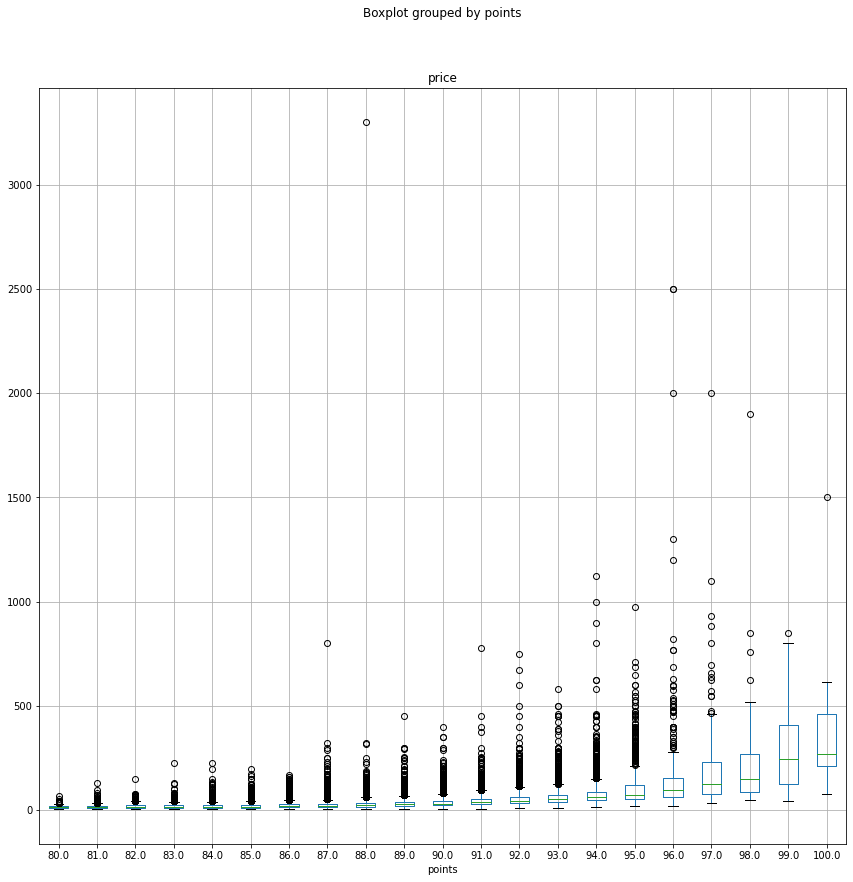

In [ ]:
df.boxplot(by='points',column=['price'], figsize=(14,14))

From this box plot, it seems to show that as points go up, so will prices. However, we notice quite a bit of variance across the board, and confirm that the variance seems to grow more dramatically toward the side with greater points. 

# EDA checklist
- Box plot points vs price
- Scatter plot points vs price
- Historgram points vs country
- Histogram price vs points
- 2 describes
- Scatter plot price vs year

#### Total 7

